In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

from pylab import *
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.cbook import get_sample_data

from config.cubes import makeCubes
from config.seismicZones import query
from config.sqlcollect import getTable

from visualization import visualize

In [2]:
mapcoords={}

In [4]:
# ---------------------------SETUP AND COLLECTION OF QUAKES------------------------------------#
# Which region do you want to analyze ?
region = input('Input region : vrancea / romania / california / italy / japan : ')

# The side of the cubes that you split the region in 
#side = int(input('Input side of the cube split in km 5 / 10 / 20 : '))

# The condition for the SQL collection
sql_query= query(region)

# Magnitude windows for the condition that collects the database through mySQL
magMin = int(input('Input minimum magnitude: '))
magMax = int(input('Input maximum magnitude: '))
# Add to condition
sql_query+=f" AND magnitude>={magMin} AND magnitude<={magMax}"
    
print(sql_query)

# Collect the earthquakes
quakes = getTable(sql_query)
quakes.head()

SELECT * FROM romania WHERE datetime >='1976-01-01 00:00:00' AND latitude>=45.2 AND latitude<=46 AND longitude>=26 AND longitude<=27 AND depth>=50 AND depth<=200 AND magnitude>=2 AND magnitude<=10


/media/gabipana/hdd1/Work/PROJECTS/seismicNetworks/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,datetime,latitude,longitude,depth,magnitude
0,1976-08-19 19:03:00.800,45.54,26.37,162.0,2.3
1,1976-09-07 17:38:08.200,45.62,26.50,155.3,3.6
2,1976-10-01 17:50:43.200,45.68,26.49,146.0,6.0
3,1977-03-04 19:21:54.100,45.77,26.76,94.0,7.4
4,1977-03-04 21:21:01.100,45.22,26.65,141.0,3.0


In [5]:
mapcoords={'minLat':min(quakes['latitude']),
            'maxLat':max(quakes['latitude']),
            'minLon':min(quakes['longitude']),
            'maxLon':max(quakes['longitude']),
            'minDepth':min(quakes['depth']),
            'maxDepth':max(quakes['depth'])
            }

In [6]:
# quakes = makeCubes(quakes,region,side=10)
# quakes.head()

In [7]:
side = 10
longitudeInKm = 79

In [8]:
maxLat = mapcoords['maxLat']
minLat = mapcoords['minLat']
maxLong = mapcoords['maxLon']
minLong = mapcoords['minLon']
maxDepth = mapcoords['maxDepth']
minDepth = mapcoords['minDepth']

In [9]:
xDim = round((maxLat-minLat)*111 / side) 
yDim = round((maxLong-minLong)*longitudeInKm / side) 
zDim = round((maxDepth-minDepth) / side) 

In [10]:
rescaleLat = [(i-minLat)/(maxLat-minLat)*xDim for i in quakes['latitude']]
rescaleLong = [(i-minLong)/(maxLong-minLong)*yDim for i in quakes['longitude']]
rescaleDepth = [zDim - (i-minDepth)/(maxDepth-minDepth)*zDim for i in quakes['depth']]

In [11]:
coords={'minLat':min(rescaleLat),
            'maxLat':max(rescaleLat),
            'minLon':min(rescaleLong),
            'maxLon':max(rescaleLong),
            'minDepth':min(rescaleDepth),
            'maxDepth':max(rescaleDepth)
            }

In [12]:
# cubex = [minLat + i*side/111 for i in range(xDim)]
# cubey = [minLong + i*side/longitudeInKm for i in range(yDim)]
# cubez = [minDepth + i*side for i in range(zDim)]

#axes=[len(cubex),len(cubey),len(cubez)]

In [13]:
axes=[xDim,yDim,zDim]
data = np.ones(axes, dtype=bool)

facecolors = np.where(data, '#FFD65DC0', '#7A88CCC0')
edgecolors = np.where(data, '#BFAB6E', '#7D84A6')

In [14]:
magnitudes=[float(x) for x in quakes['magnitude']]

# Set scale for the sizes of dots
mean = int(quakes['magnitude'].mean())
max1 = int(quakes['magnitude'].max())
min1 = int(quakes['magnitude'].min())
magnitudesScale=[((x-mean)/(max1-min1))*200 for x in quakes['magnitude']]

/media/gabipana/hdd1/Work/PROJECTS/seismicNetworks/venv/lib/python3.8/site-packages/matplotlib/collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/media/gabipana/hdd1/Work/PROJECTS/seismicNetworks/venv/lib/python3.8/site-packages/matplotlib/collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


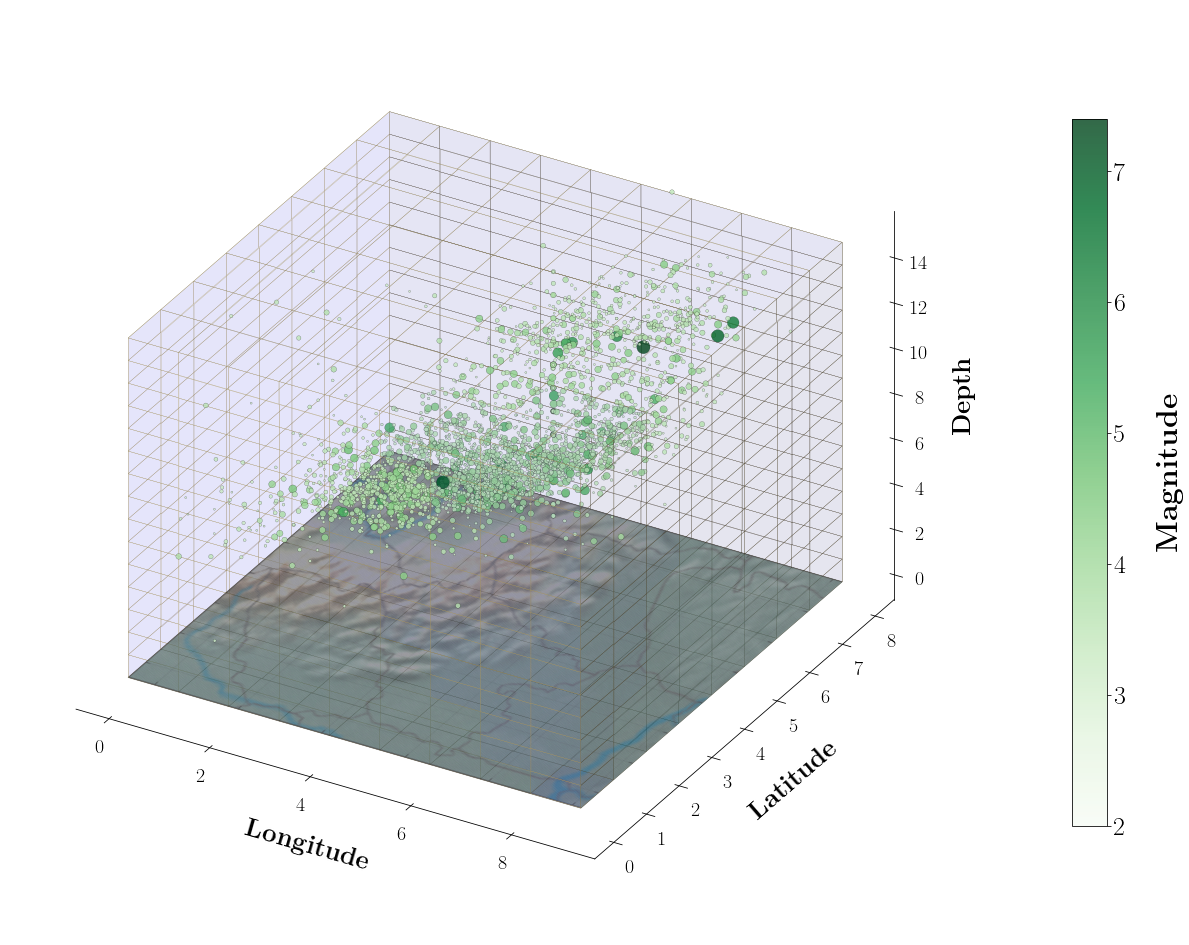

In [14]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.set_proj_type('ortho')
# Voxels is used to customizations 
# of the sizes, positions and colors.


# Scatter the earthquakes and use scales to customize the dots
# im = ax.scatter(quakes['yLongitude'],quakes['xLatitude'],quakes['zDepth'],
#         s=magnitudesScale ,c=magnitudes, cmap='Greens', marker='o',
#         edgecolor='black', linewidth=0.2, alpha=0.8)
im = ax.scatter(rescaleLong,rescaleLat,rescaleDepth,
        s=magnitudesScale ,c=magnitudes, cmap='Greens', marker='o',
        edgecolor='black', linewidth=0.2, alpha=0.8)

# Label the axes
ax.set_xlabel(r'$\mathbf{Longitude}$', fontsize=26, fontweight='bold',labelpad=25)
ax.set_ylabel(r'$\mathbf{Latitude}$',fontsize=26, fontweight='bold',labelpad=25)
ax.set_zlabel(r'$\mathbf{Depth}$', fontsize=26, fontweight='bold',labelpad=20)

plt.rcParams['text.usetex'] = True
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_zticklabels(), fontsize=20)

ax.tick_params(axis='both', which='major', pad=7)

# Show the colorbar used on the magnitude scale
cbar = fig.colorbar(im, ax=ax, orientation='vertical',fraction=0.046, pad=0.12, shrink=0.65)
# Label the colorbar
cbar.set_label(r'$\mathbf{Magnitude}$',fontsize=30, fontweight='bold',labelpad=30)
cbar.ax.tick_params(labelsize=26)


# Remove gray panes and axis grid
ax.xaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('white')
ax.yaxis.pane.fill = False
ax.yaxis.pane.set_edgecolor('white')
ax.zaxis.pane.fill = False
ax.zaxis.pane.set_edgecolor('white')
ax.grid(False)

ax.voxels(data, facecolors='blue', edgecolors=edgecolors, linewidth=0.25, alpha=0.05);
# xmin, xmax = plt.xlim()
# ymin, ymax = plt.ylim()

# plt.xlim(xmin * scale_factor, xmax * scale_factor)
# plt.ylim(ymin * scale_factor, ymax * scale_factor)


img = mpimg.imread(f'./maps/{region}.png')
# Create lists of points ranging from:
# For x : longitude 

xx = np.linspace(0,xDim,img.shape[0])
# For y : latitude 
yy = np.linspace(0,yDim,img.shape[1])

# xx = np.linspace(coords['minLon'],coords['maxLon'],img.shape[0])
# # For y : latitude 
# yy = np.linspace(coords['minLat'],coords['maxLat'],img.shape[1])

# Create the x component of the grid for the image plot
x = np.ndarray((img.shape[0],1))
# Create y component of the grid for the image plot
y = np.ndarray((1,img.shape[1]))
# Create the z component (choose at which depth the image is plotted)
z =  np.zeros(x.shape)


# Assign x values (first component) the proper longitude
for i in range(len(x)):
        x[i][0] = float(xx[i])

# Assign y values (second component) the proper latitude
for j in range(len(y[0])):
        y[0][j] = float(yy[j])


# Plot the overlay with the map under the scattered eathquakes 
ax.plot_surface(x,y,z, facecolors=img, rstride=1, cstride=1, alpha=0.2)

plt.savefig(f'./results/{region}/visualization/{region}_{magMin}mag_cubes_map.png',
                facecolor='white', transparent=False, bbox_inches = "tight" )

In [15]:
len(rescaleLong)

7673

In [15]:
axes=[xDim+1,yDim+1,zDim+1]
data = np.ones(axes, dtype=bool)

facecolors = np.where(data, '#FFD65DC0', '#7A88CCC0')
edgecolors = np.where(data, '#BFAB6E', '#7D84A6')

In [62]:
for numberpoints in [1,2,3,10,50,100,500,1000,5000,7000]:

    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_proj_type('ortho')
    


    # Scatter the earthquakes and use scales to customize the dots
    im = ax.plot(rescaleLong[:numberpoints],rescaleLat[:numberpoints],rescaleDepth[:numberpoints],
        'o-', alpha = 0.6, c='green', linewidth=0.6,
        markersize=8, markeredgewidth=0.4, markeredgecolor='black')

    # Label the axes
    ax.set_xlabel(r'$\mathbf{Longitude}$', fontsize=26, fontweight='bold',labelpad=25)
    ax.set_ylabel(r'$\mathbf{Latitude}$',fontsize=26, fontweight='bold',labelpad=25)
    ax.set_zlabel(r'$\mathbf{Depth}$', fontsize=26, fontweight='bold',labelpad=20)

    plt.rcParams['text.usetex'] = True
    plt.setp(ax.get_xticklabels(), fontsize=20)
    plt.setp(ax.get_yticklabels(), fontsize=20)
    plt.setp(ax.get_zticklabels(), fontsize=20)

    ax.tick_params(axis='both', which='major', pad=7)

    # # Show the colorbar used on the magnitude scale
    # cbar = fig.colorbar(im, ax=ax, orientation='vertical',fraction=0.046, pad=0.12, shrink=0.65)
    # # Label the colorbar
    # cbar.set_label(r'$\mathbf{Magnitude}$',fontsize=20, fontweight='bold',labelpad=15)

    # Remove gray panes and axis grid
    ax.xaxis.pane.fill = False
    ax.xaxis.pane.set_edgecolor('white')
    ax.yaxis.pane.fill = False
    ax.yaxis.pane.set_edgecolor('white')
    ax.zaxis.pane.fill = False
    ax.zaxis.pane.set_edgecolor('white')
    ax.grid(False)


    # Voxels is used to customizations 
    # of the sizes, positions and colors.
    # THE CUBES
    ax.voxels(data, facecolors='blue', edgecolors='lightblue', linewidth=0.4, alpha=0.03);


    # THE MAP - OPTIONAL 
    # img = mpimg.imread(f'./maps/{region}.png')
    # # Create lists of points ranging from:
    # # For x : longitude 

    # xx = np.linspace(0,xDim,img.shape[0])
    # # For y : latitude 
    # yy = np.linspace(0,yDim,img.shape[1])

    # # xx = np.linspace(coords['minLon'],coords['maxLon'],img.shape[0])
    # # # For y : latitude 
    # # yy = np.linspace(coords['minLat'],coords['maxLat'],img.shape[1])

    # # Create the x component of the grid for the image plot
    # x = np.ndarray((img.shape[0],1))
    # # Create y component of the grid for the image plot
    # y = np.ndarray((1,img.shape[1]))
    # # Create the z component (choose at which depth the image is plotted)
    # z =  -25 * np.zeros(x.shape)


    # # Assign x values (first component) the proper longitude
    # for i in range(len(x)):
    #         x[i][0] = float(xx[i])

    # # Assign y values (second component) the proper latitude
    # for j in range(len(y[0])):
    #         y[0][j] = float(yy[j])


    # # Plot the overlay with the map under the scattered eathquakes 
    # ax.plot_surface(x,y,z, facecolors=img, rstride=1, cstride=1, alpha=0.4)




    plt.savefig(f'./results/{region}/visualization/{region}_{magMin}mag_cubes_graph{numberpoints}.png',
                    facecolor='white', transparent=False, bbox_inches = "tight" )

    plt.close();


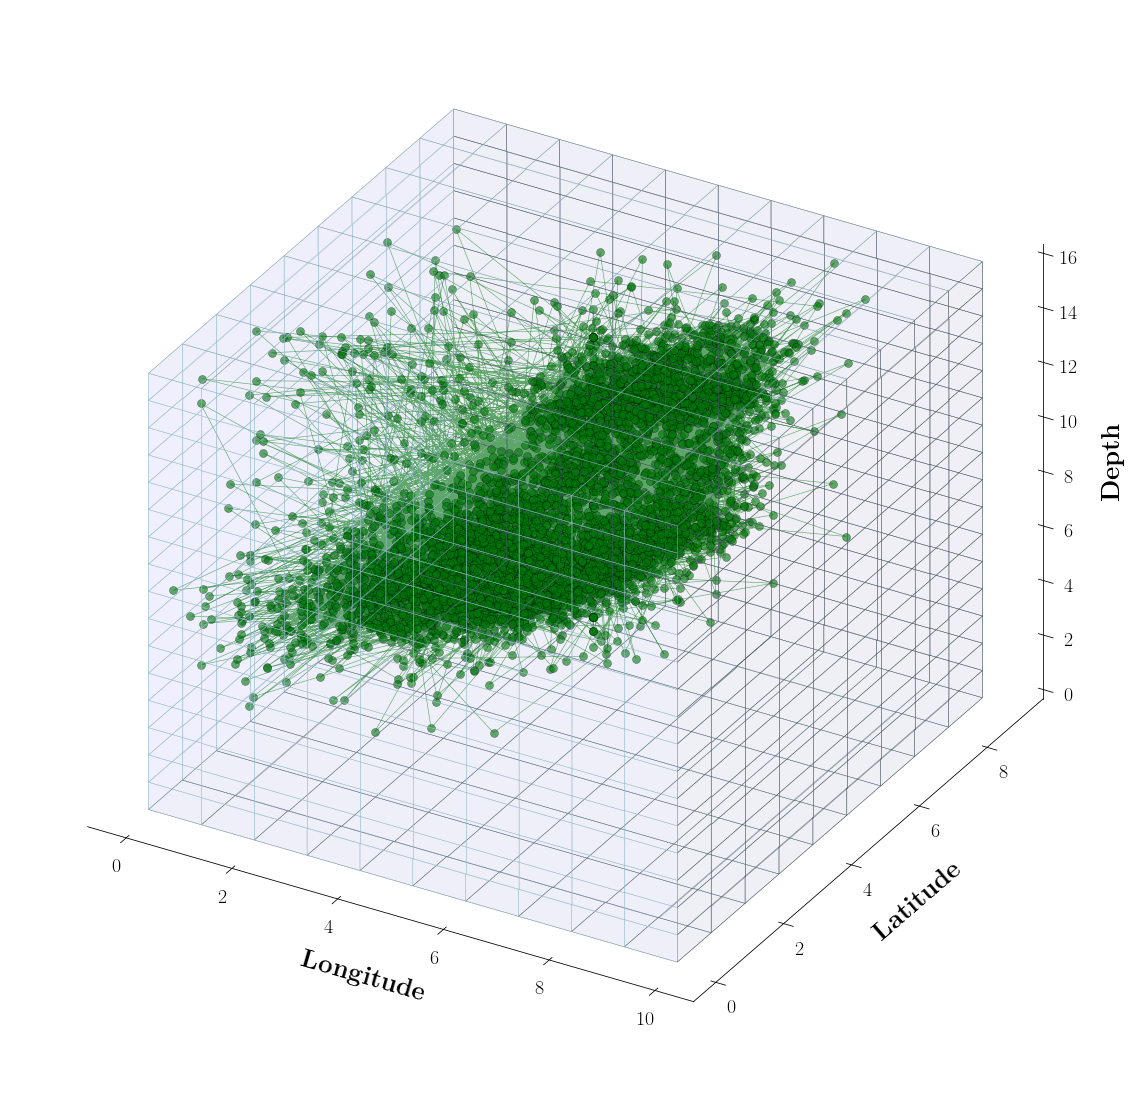

In [61]:
numberpoints = 7000

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.set_proj_type('ortho')
# Voxels is used to customizations 
# of the sizes, positions and colors.



# Scatter the earthquakes and use scales to customize the dots
im = ax.plot(rescaleLong[:numberpoints],rescaleLat[:numberpoints],rescaleDepth[:numberpoints],
        'o-', alpha = 0.6, c='green', linewidth=0.6,
        markersize=8, markeredgewidth=0.4, markeredgecolor='black')

# Label the axes
ax.set_xlabel(r'$\mathbf{Longitude}$', fontsize=26, fontweight='bold',labelpad=25)
ax.set_ylabel(r'$\mathbf{Latitude}$',fontsize=26, fontweight='bold',labelpad=25)
ax.set_zlabel(r'$\mathbf{Depth}$', fontsize=26, fontweight='bold',labelpad=20)

plt.rcParams['text.usetex'] = True
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_zticklabels(), fontsize=20)

ax.tick_params(axis='both', which='major', pad=7)

# # Show the colorbar used on the magnitude scale
# cbar = fig.colorbar(im, ax=ax, orientation='vertical',fraction=0.046, pad=0.12, shrink=0.65)
# # Label the colorbar
# cbar.set_label(r'$\mathbf{Magnitude}$',fontsize=20, fontweight='bold',labelpad=15)

# Remove gray panes and axis grid
ax.xaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('white')
ax.yaxis.pane.fill = False
ax.yaxis.pane.set_edgecolor('white')
ax.zaxis.pane.fill = False
ax.zaxis.pane.set_edgecolor('white')
ax.grid(False)



# THE CUBES
ax.voxels(data, facecolors='blue', edgecolors='lightblue', linewidth=0.4, alpha=0.03);